### Import packages and visualization

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import minimize, rosen, rosen_der, rosen_hess
# rosen, rosen_der, rosen_hess is the built-in Rosenborck function and its first and second order derivative

In [2]:
def visualize(x_iter):
    x0_iter = np.array([i[0] for i in x_iter])
    x1_iter = np.array([i[1] for i in x_iter])
    x = np.linspace(-2,2,1000)
    y = np.linspace(-1,3,1000)
    X, Y = np.meshgrid(x, y)
    Z = rosen([X,Y])

    anglesx = x0_iter[1:] - x0_iter[:-1]
    anglesy = x1_iter[1:] - x1_iter[:-1]

    %matplotlib inline
    fig, ax = plt.subplots()
    CS = ax.contour(X, Y, Z, 50, cmap = 'jet')
    ax.set_title('Contour')
    for i in x_iter:
        ax.scatter(i[0],i[1],color = 'r', marker = '.')

    for i in range(len(x_iter)-1):
        ax.quiver(x_iter[i][0], x_iter[i][1], anglesx[i], anglesy[i], scale_units = 'xy', angles = 'xy', scale = 1, color = 'r', alpha = .3)

    plt.show()

### 1. BFGS 

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 35
         Function evaluations: 126
         Gradient evaluations: 42


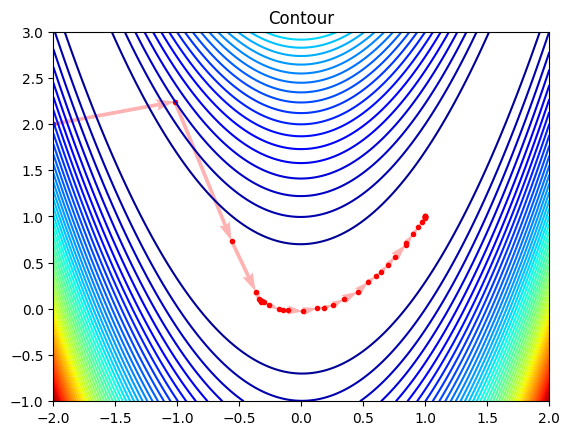

In [3]:
x0 = np.array([-2,2])
x_iter = list() # a list which contains new x for each step of iteration
# TODO (HINT: Hessian will NOT be used in this optimize function)
res= minimize(rosen, x0, method='BFGS', options={'return_all': True,'disp':True})
#print(res.allvecs)
for e in res.allvecs:
    x_iter.append(e)
x_iter.insert(0,x0)
visualize(x_iter)



In [4]:
res.allvecs[1]

array([-1.01994107,  2.24409936])

In [5]:
res.x

array([0.99999575, 0.99999152])

### 2. Conjugate Gradient 

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 38
         Function evaluations: 276
         Gradient evaluations: 92


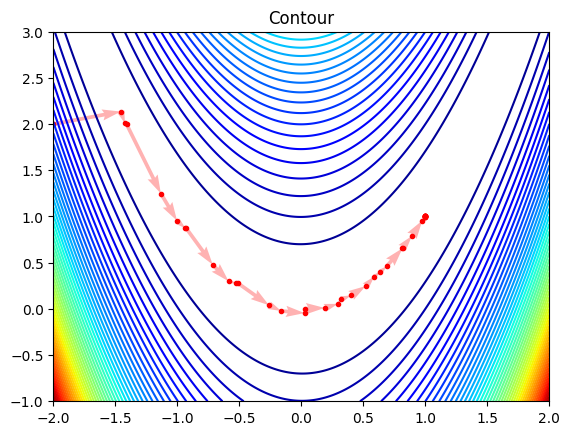

In [6]:
x0 = np.array([-2,2])
x_iter = list()
# TODO (HINT: Hessian will NOT be used in this optimize function)
res= minimize(rosen, x0, method='CG', options={'return_all': True,'disp':True})
#print(res.allvecs)
for e in res.allvecs:
    x_iter.append(e)
x_iter.insert(0,x0)
visualize(x_iter)

In [7]:
res.allvecs[1]

array([-1.45588717,  2.13552001])

In [8]:
res.x

array([0.99999983, 0.99999969])

### 3. Modified Newton's method with conjugate gradiet (Newton-CG)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 275
         Function evaluations: 296
         Gradient evaluations: 296
         Hessian evaluations: 275


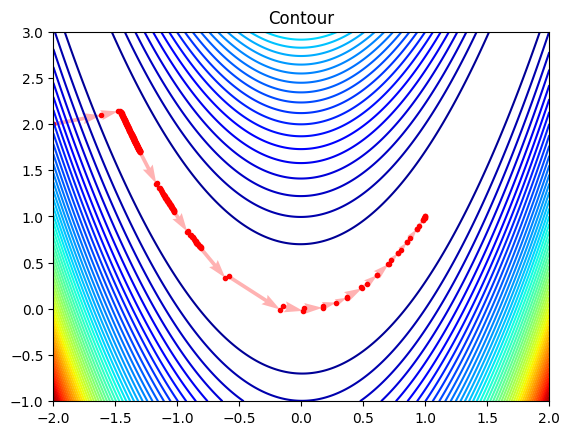

In [9]:
x0 = np.array([-2,2])
x_iter = list()

res = minimize(rosen, x0, method='Newton-CG',jac=rosen_der, hess=rosen_hess,options={'return_all': True, 'disp': True})

for e in res.allvecs:
    x_iter.append(e)
    
x_iter.insert(0,x0)
visualize(x_iter)


In [10]:
res.allvecs[1]

array([-1.6134919 ,  2.09626603])

In [11]:
res.x

array([0.99997225, 0.9999444 ])

### 4. Gradient Descent with optimal step length

In [36]:
import sys
sys.setrecursionlimit(50000) #to avoid RecursionError: maximum recursion depth exceeded while calling a Python object

In [42]:
x_iter=[]
iter_count=0

def Gradient_Descent(Grad, x, epsilon=0.00001, nMax = 30000):
    # Input arguments:
        # Grad: the derivative of the objective function
        # x: initial guess
        # epsilon: the tolerence of error during optimization, if error is less than epsilon we consider it as convergence
        # nMax: maxinum number of iteration, you can manually modify this constatnt if the default value is not enough
    # Output arguments:
        # x_iter: a list which contains new x for each step of iteration
        # iter_count: an integer, the number of iteration the algorithm taken to convergence
    
    #iter_count=1
    
    #p = -Grad(x)
    
    x0=x
    def f(t):
        return rosen(x0-t*Grad(x0))
    
    alpha = minimize(f , 0, method='Nelder-Mead', options={'return_all': False,'disp':False}) #step size
    
    #print(alpha)
    
    x_new = x - (alpha.x)*(Grad(x))
    x_iter.append(x_new)
    
    if (np.linalg.norm(Grad(x))) < epsilon or (len(x_iter)>nMax):
        
        return x_iter, len(x_iter)
    else:
        #iter_count=iter_count+1
        return Gradient_Descent(Grad, x_new)
    
   
    



Iteration Count: 11826

At [0.99999203 0.99998405], the function value is 6.351963040237013e-11


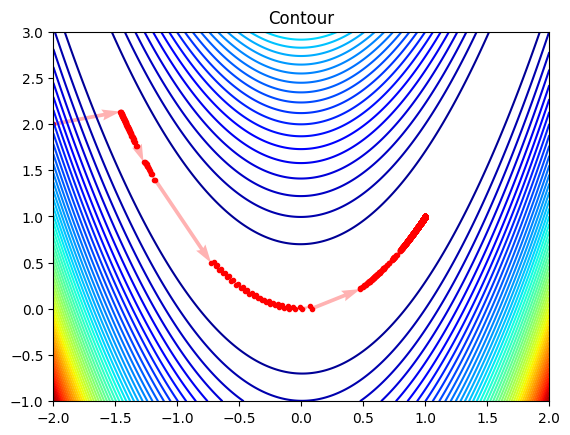

In [40]:
x0 = np.array([-2,2])
x_iter, iter_count = Gradient_Descent(rosen_der,x0)
x_iter.insert(0,x0) #add initial point
print('Iteration Count: %d\n' % iter_count)
print('At ', x_iter[-1], ', the function value is ', rosen(x_iter[-1]), sep='')
visualize(x_iter)

In [41]:
x_iter[1]

array([-1.45813184,  2.13496094])

### 5. Pure Newton's Method

In [30]:
x_iter=[]
iter_count=0
def Newton(Grad, Grad2, x, epsilon=0.00001, nMax = 1000):
    # TODO
    # Input arguments:
        # Grad: the derivative of the objective function
        # Grad2: the second derivative of the objective function
        # x: initial guess
        # epsilon: the tolerence of error during optimization, if error is less than epsilon we consider it as convergence
        # nMax: maxinum number of iteration, you can manually modify this constatnt if the default value is not enough
    # Output arguments: (same as above)
    # Hint: Use numpy.linalg to compute the inverse of a matrix
    

    
    x_new = x - np.matmul(np.linalg.inv(Grad2(x)),Grad(x))
    x_iter.append(x_new)
    
    if (np.linalg.norm(Grad(x)) < epsilon) or (len(x_iter)>nMax):
        return x_iter, len(x_iter)
    else:
        #iter_count=iter_count+1
        return Newton(Grad,Grad2, x_new)
    
    
    
    
    

Iteration Count: 6

At [1. 1.], the function value is 0.0


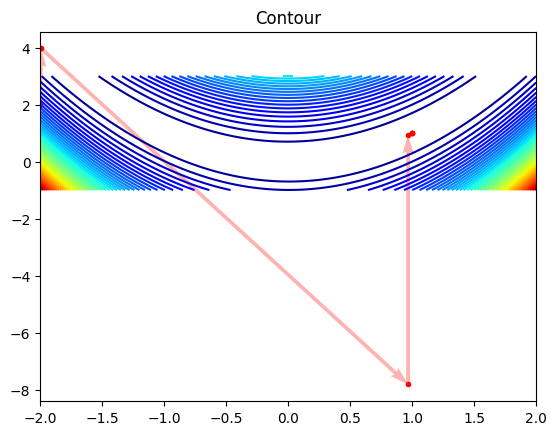

In [31]:
x0 = np.array([-2,2])
x_iter, iter_count = Newton(rosen_der,rosen_hess,x0)
x_iter.insert(0,x0)
print('Iteration Count: %d\n' % iter_count)
print('At ', x_iter[-1], ', the function value is ', rosen(x_iter[-1]), sep='')
visualize(x_iter)

In [32]:
x_iter[1]

array([-1.9925187 ,  3.97007481])

In [33]:
x_iter[:6]

[array([-2,  2]),
 array([-1.9925187 ,  3.97007481]),
 array([ 0.96687269, -7.82315462]),
 array([0.96689159, 0.93487935]),
 array([1.        , 0.99890383]),
 array([1., 1.])]